# Exploratory Data Analysis (EDA)
## Customer Churn

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Customer Churn.csv')

df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0) # replace empty strings with 0
df['TotalCharges'] = df['TotalCharges'].astype(float) # convert to float 

In [ ]:
df.info() # check if the conversion worked 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull() # check for null values

df.isnull().sum() # count null values in each column 

df.isnull().sum().sum() # total number of null values in the dataframe 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.describe() # get summary statistics of the numerical columns 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.duplicated().sum() # check for duplicate rows 

df['customerID'].duplicated().sum() # check for duplicate in column customer IDs 

np.int64(0)

In [21]:
def conv(value):   # convert SeniorCitizen column from 0/1 to Yes/No 
    if value == '1':
        return 'Yes'
    else:
        return 'No'
    
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv) # convert SeniorCitizen column to Yes/No 

df.head() # check the first few rows to see the changes 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


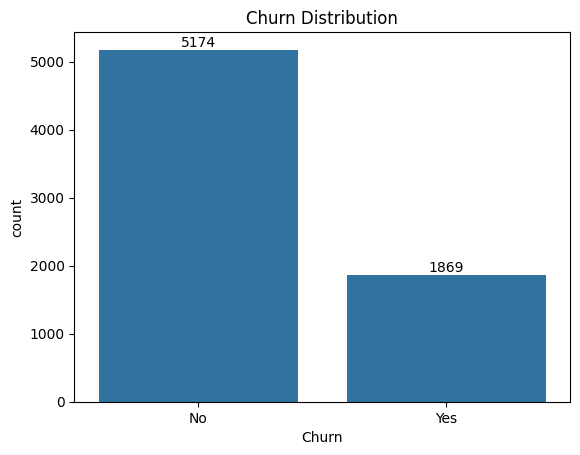

In [43]:
ax = sns.countplot(x='Churn', data=df) # plot the count of churned vs not churned customers

ax.bar_label(ax.containers[0]) # add labels to the bars 

plt.title('Churn Distribution') # set the title of the pie chart
plt.show() # display the plot

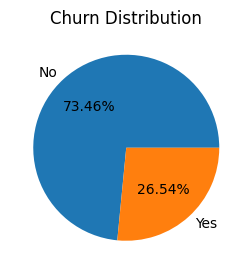

In [42]:
plt.figure(figsize = (3, 4)) # set the figure size 
gb = df.groupby('Churn').agg({'Churn': 'count'})

plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%') # create a pie chart of churned vs not churned customers

plt.title('Churn Distribution') # set the title of the pie chart
plt.show() # display the pie chart

<function matplotlib.pyplot.show(close=None, block=None)>

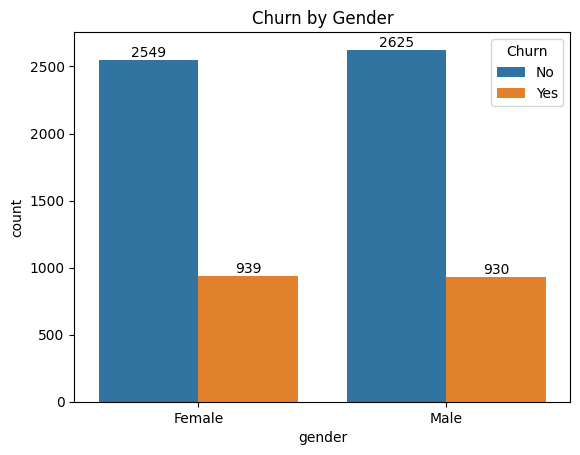

In [58]:
plt.Figure(figsize=(4, 4)) # set the figure size for the bar plot

a = sns.countplot(x='gender', data=df, hue = 'Churn') # create a count plot of churned vs not churned customers with hue 

for container in a.containers:
    a.bar_label(container)


plt.title('Churn by Gender') # set the title of the plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

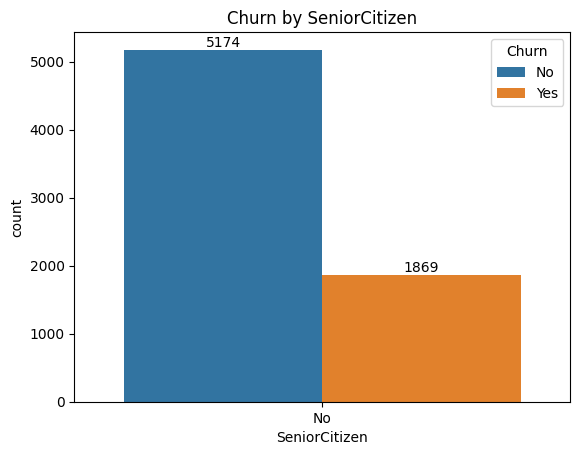

In [61]:
plt.Figure(figsize=(4, 4)) # set the figure size for the bar plot

a = sns.countplot(x='SeniorCitizen', data=df, hue = 'Churn') # create a count plot of churned vs not churned customers with hue 

for container in a.containers:
    a.bar_label(container)


plt.title('Churn by SeniorCitizen') # set the title of the plot
plt.show

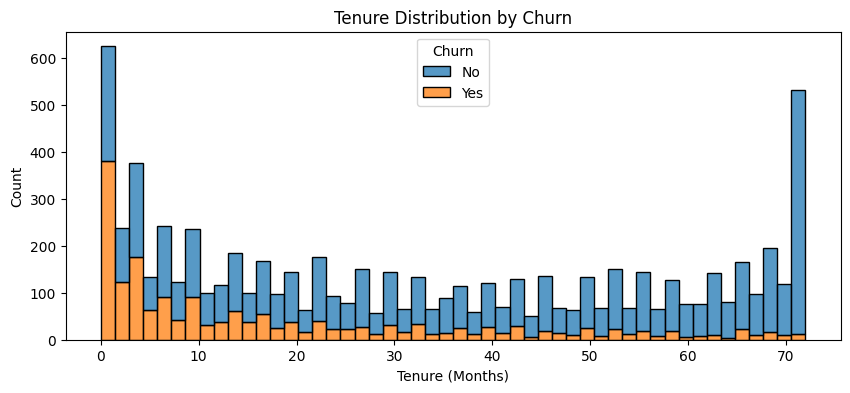

In [66]:
plt.figure(figsize=(10, 4)) # set the figure size for the bar plot
sns.histplot(x = 'tenure', data=df, hue='Churn', multiple='stack', bins= 50) # create a histogram of tenure with hue for churn 

plt.title('Tenure Distribution by Churn') # set the title of the plot
plt.xlabel('Tenure (Months)') # set the x-axis label
plt.ylabel('Count') # set the y-axis label

plt.show() # display the plot

<function matplotlib.pyplot.show(close=None, block=None)>

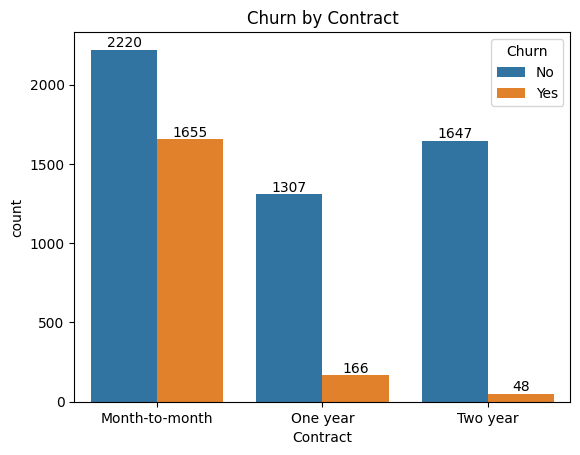

In [ ]:
plt.Figure(figsize=(4, 4)) # set the figure size for the bar plot

a = sns.countplot(x='Contract', data=df, hue = 'Churn') # create a count plot of churned vs not churned customers with hue

for container in a.containers: # add labels to the bars
    a.bar_label(container)


plt.title('Churn by Contract') # set the title of the plot
plt.show

In [68]:
df.columns.values # get the column names of the dataframe 

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

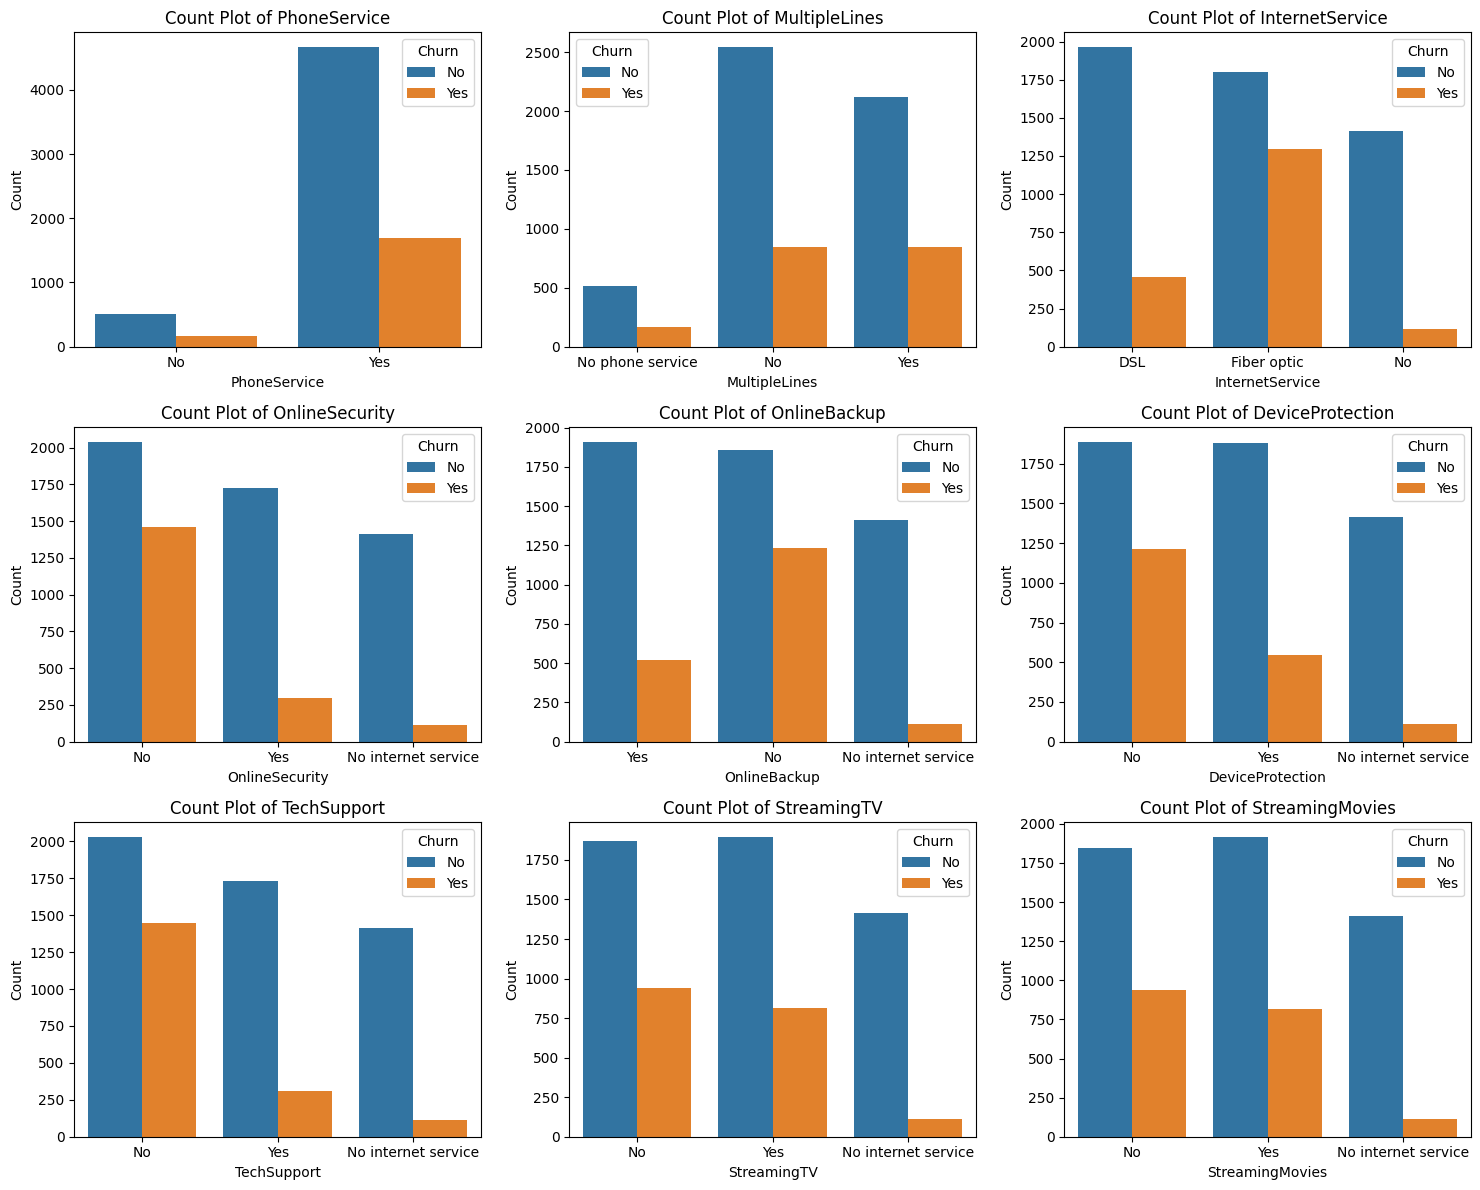

In [73]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
